In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [4]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# os.chdir("/content/drive/My Drive/CA684_Assignment/Dev-set")

In [2]:
ground_truth = pd.read_csv('D:/DCU/2nd Semester/Assignments/Machine Learning/My Assignment/ground-truth.csv', header=0)

In [3]:
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [4]:
#Checking the correlation between the columns
ground_truth.corr()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
short-term_memorability,1.000000,-0.021178,0.325002,-0.013858
nb_short-term_annotations,-0.021178,1.000000,-0.047093,0.285548
long-term_memorability,0.325002,-0.047093,1.000000,0.036051
nb_long-term_annotations,-0.013858,0.285548,0.036051,1.000000


In [5]:
ground_truth = ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [6]:
#importing the captions from a text file
video_captions = pd.read_csv('G:/.shortcut-targets-by-id/1UWIdExqb5P94RLqkaiODcwFC2v7g3lB2/CA684_Assignment/Dev-set/Captions/dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))

In [7]:
video_captions.head()

,video,Captions
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot


In [8]:
df = pd.merge(ground_truth, video_captions, on = 'video')

In [9]:
df.nlargest(10, ['short-term_memorability'])

,video,short-term_memorability,long-term_memorability,Captions
651,video798.webm,0.989,1.000,camera-moves-in-on-beared-man-with-shovel-taki...
1599,video1981.webm,0.987,0.769,happy-stylish-elegant-young-couple-welcoming-i...
3910,video4903.webm,0.987,0.600,mather-and-daughter-enjoying-a-movie-on-tablet
1771,video2203.webm,0.986,0.800,astronaut-in-outer-space-against-the-backdrop-...
1903,video2364.webm,0.986,1.000,head-of-big-yellow-eel
2089,video2596.webm,0.986,0.733,funny-little-boy-sitting-at-desk-eating-apple-...
4024,video5047.webm,0.986,1.000,khr-western-unloadinggun
4880,video6103.webm,0.986,0.731,young-asian-woman-during-snowfall-slowmotion
398,video498.webm,0.985,0.750,man-reading-in-closed-in-porch
633,video778.webm,0.985,0.929,portrait-of-real-asian-people-with-emotions-an...


In [10]:
df.nlargest(10, ['long-term_memorability'])

,video,short-term_memorability,long-term_memorability,Captions
8,video17.webm,0.777,1.0,hoover-dam-tourists-traffic
9,video18.webm,0.863,1.0,happy-girl-stretching-and-relaxing-on-the-station
33,video44.webm,0.828,1.0,christmas-market-at-schloss-charlottenburg-cha...
44,video56.webm,0.953,1.0,trackingof-a-couple-removing-a-sign-from-the-f...
46,video58.webm,0.744,1.0,firefighters-by-flaming-car
50,video63.webm,0.924,1.0,steadicamof-african-american-american-sports-f...
51,video65.webm,0.979,1.0,cowboy-pounds-fencepost
54,video68.webm,0.937,1.0,young-couple-portrait-smile-with-happiness-wit...
69,video85.webm,0.924,1.0,puppies-playing
70,video86.webm,0.983,1.0,young-couple-with-bottle-of-wine-standing-on-s...


In [11]:
# Importing the NLP Libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# import nltk
# nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [12]:
cleaned_captions = []
for i in range(0, 6000):
    text = re.sub('[^a-zA-Z]', ' ', video_captions['Captions'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    cleaned_captions.append(text)

In [13]:
cleaned_captions[0]


'blonde woman massaged tilt'

# **CAPTION COUNTVECTORIZOR**

In [14]:
negavtive_weights = {'mountains':0.01,'sunset':0.02,'trees':0.03,'mountain':0.04,'clouds':0.05,'river':0.06,'aerialof':0.07,'lake':0.08,'forest':0.09,'kenya':0.10,'landscape':0.11,'valley':0.12,'leaves':0.13,'sun':0.14}

In [15]:
positive_weights = {'woman':0.65,'eating':0.64,'putting':0.63,'lying':0.62,'girl':0.61,'selfie':0.60,'relaxing':0.59,'jellyfish':0.58,'cat':0.57,'super':0.56,'slow':0.55,'super':0.54,'american':0.53,'potrait':0.52,'pregnant':0.51,'couple':0.50}

In [16]:
pos_list = []
neg_list = []
for i in range(0, 6000):
    local_pos_weight = 0
    local_neg_weight = 0
    text = video_captions['Captions'][i]
    text = text.split()
    for word in text:
        if(word in set(positive_weights.keys())):
                pw = local_pos_weight + positive_weights[word]
        if(word in set(negavtive_weights.keys())):
                nw = local_neg_weight + negavtive_weights[word]
    pos_list.append(local_pos_weight)
    neg_list.append(local_neg_weight)

In [17]:
weights_df = pd.DataFrame(
    {'positive_weights': pos_list,
     'negative_weights': neg_list
    })

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [19]:
#Extracting the TFIDF features from the captions
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [20]:
#Using CountVectorizer for feature Extraction
caption_features = cv.fit_transform(cleaned_captions).toarray()

In [21]:
caption_features[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
caption_features.shape

(6000, 5087)

Inputting the data into X and Y variables

**bold text**

In [28]:
#Training Caption Modal
X = caption_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

bold text

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

Function Spearmann"s correlation coefficient

In [30]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

Using Linear Regression Model on Captions

In [31]:
# **Using Linear Regression Model on Captions**
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.094
The Spearman's correlation coefficient is: 0.077


Using Decision Tree Regression Model on Captions

bold text

In [33]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.270
The Spearman's correlation coefficient is: 0.145


# h2 VISIT AGAIN Fitting Random Forest Regression model on Captions

bold text

In [34]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


KeyboardInterrupt: 

In [38]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.393
The Spearman's correlation coefficient is: 0.193


## TFIDF score instead of count vectorizer

bold text

In [35]:
# **Using TFIDF score instead of count vectorizer**
captions_tfidf_features = tf.fit_transform(cleaned_captions).toarray()
X= captions_tfidf_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

bold text

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

Using Linear Regression Model on Captions with TFIDF

bold text

In [37]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.140
The Spearman's correlation coefficient is: -0.001


Using Decision Tree Regression Model on Captions with TFIDF

In [39]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.280
The Spearman's correlation coefficient is: 0.140


# h1 Keeps on Running Random Forest Regression model on Captions with
*italicized text*
> Indented block



Fitting Random Forest Regression model on Captions with TFIDF

In [80]:
# **Fitting Random Forest Regression model on Captions with TFIDF**
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 100)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.021
The Spearman's correlation coefficient is: 0.048


Visualizing the results for Captions with TFIDF

In [41]:
#Storing the predicted results into a dataframe 
pred = pd.DataFrame(np.array(y_pred).reshape(1200,2), columns = ("shortPred","longPred"))

In [42]:
#Storing the actual test set values into a dataframe
actual = pd.DataFrame(np.array(y_test).reshape(1200,2), columns = ("shortActual","longActual"))

plotting the Actual vs Predicited for Short Term Memorability



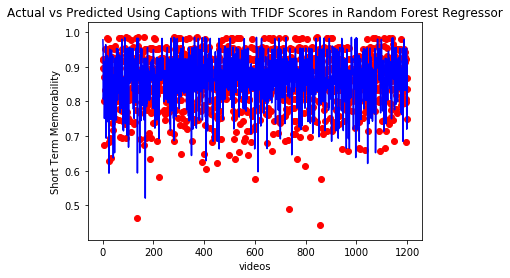

In [43]:
xTest = range(1,1201)
plt.scatter(xTest, actual["shortActual"], color = 'red')
plt.plot(xTest, pred["shortPred"], color = 'blue')
plt.title('Actual vs Predicted Using Captions with TFIDF Scores in Random Forest Regressor')
plt.xlabel('videos')
plt.ylabel('Short Term Memorability')
plt.show()

plotting the Actual vs Predicited for Long Term Memorability

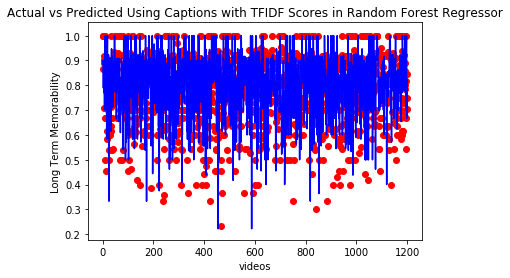

In [44]:
xTest = range(1,1201)
plt.scatter(xTest, actual["longActual"], color = 'red')
plt.plot(xTest, pred["longPred"], color = 'blue')
plt.title('Actual vs Predicted Using Captions with TFIDF Scores in Random Forest Regressor')
plt.xlabel('videos')
plt.ylabel('Long Term Memorability')
plt.show()

# h1 Visit Again Using ANN Sequential Model on Captions with TFIDF

bold text

In [47]:
pip install pyprind


Note: you may need to restart the kernel to use updated packages.


In [49]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

ModuleNotFoundError: No module named 'keras'

In [89]:
captions_tfidf_features.shape

(6000, 5087)

In [0]:
max_len =5087

In [0]:
X = captions_tfidf_features
y = ground_truth.iloc[:, 1:3].values

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

Building a sequntial model with 2 layers.

bold text

In [93]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 1s 212us/step - loss: 0.0862 - accuracy: 0.6575 - val_loss: 0.0255 - val_accuracy: 0.6958
Epoch 2/10
4800/4800 [==============================] - 1s 171us/step - loss: 0.0220 - accuracy: 0.7035 - val_loss: 0.0159 - val_accuracy: 0.6958
Epoch 3/10
4800/4800 [==============================] - 1s 173us/step - loss: 0.0172 - accuracy: 0.7048 - val_loss: 0.0143 - val_accuracy: 0.6958
Epoch 4/10
4800/4800 [==============================] - 1s 172us/step - loss: 0.0159 - accuracy: 0.7065 - val_loss: 0.0139 - val_accuracy: 0.6958
Epoch 5/10
4800/4800 [==============================] - 1s 183us/step - loss: 0.0157 - accuracy: 0.7073 - val_loss: 0.0137 - val_accuracy: 0.6958
Epoch 6/10
4800/4800 [==============================] - 1s 182us/step - loss: 0.0153 - accuracy: 0.7071 - val_loss: 0.0136 - val_accuracy: 0.6958
Epoch 7/10
4800/4800 [==============================] - 1s 176us/step - loss

In [94]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.303
The Spearman's correlation coefficient is: 0.162


TFIDF gave better results compared to word count vectorizer in Random Forest Regression

bold text


## **C3D**

Defining the method for reading C3D Features from a file



In [104]:
#function to read C3D feature
def c3d_read(df, filename):
  df1 = pd.read_csv(filename, header=None, sep=' ')
  df1['video'] = filename[filename.find('video'):filename.find('.txt')] + '.webm'
  df = df.append(df1, ignore_index=True)
  return df


In [105]:
pwd

'D:\\DCU\\2nd Semester\\Assignments\\Machine Learning\\My Assignment'

Calling the method for fetching C3D features and storing them into a array list using loop

In [106]:
#read file names from the path mentioned
def reading_file_names(path):
  files = []
  file_number=0
  # r=root, d=directories, f = files
  for r, d, f in os.walk(path):
      for file in f:
          if '.txt' in file:
              files.append(os.path.join(r, file))
              file_number = file_number + 1
  print("total files read = " + str(file_number))
  return files


In [107]:
path='./C3D' #(need to chnage the path as per the directory the C3D or any other files are stored in)
files = reading_file_names(path)
dataframe_C3D = pd.DataFrame()
for filename in files:
    dataframe_C3D = c3d_read(dataframe_C3D, filename)

total files read = 6000


In [108]:
dataframe_C3D.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,video
0,0.000090,0.000615,0.003436,0.001281,3.551400e-03,3.128800e-04,0.000042,0.000018,0.000157,1.171300e-04,...,1.708900e-04,0.000231,6.371500e-04,4.001000e-05,6.142000e-05,0.000075,0.000002,0.001323,NaN,video10.webm
1,0.002312,0.009966,0.027439,0.000006,2.155300e-04,1.394600e-04,0.000111,0.000029,0.000046,2.388820e-03,...,3.939800e-04,0.008439,1.255300e-04,1.976800e-04,1.048400e-04,0.075047,0.287573,0.003510,NaN,video100.webm
2,0.468035,0.489501,0.000079,0.000010,2.000000e-07,1.540000e-06,0.000168,0.000010,0.000034,5.200000e-07,...,7.000000e-08,0.000006,1.790000e-06,9.200000e-07,1.950000e-06,0.000127,0.000714,0.000408,NaN,video1001.webm
3,0.014036,0.000492,0.000233,0.000028,6.320000e-06,1.330000e-06,0.000006,0.000002,0.000007,4.002000e-05,...,1.878000e-05,0.000049,3.068000e-05,1.310000e-06,7.410000e-06,0.830456,0.002719,0.001101,NaN,video1003.webm
4,0.046734,0.000868,0.000005,0.000008,2.000000e-08,5.600000e-07,0.000013,0.000004,0.000001,5.990000e-06,...,4.500000e-07,0.000004,2.400000e-07,1.100000e-07,3.300000e-07,0.000002,0.000018,0.000080,NaN,video1004.webm


Creating a dataframe to store the extracted C3D features with their video names



In [102]:
# c3d = pd.DataFrame(np.array(my_numlist).reshape(6000,101))
# c3d["video"] = my_namelist
# c3d["video"] = c3d['video'].str
# #creating new column as video and assigning the names of the vidoes

In [103]:
c3d.head() 
#includes video names and captions, which will help further while merging these features with ground truth

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,video
0,0.000090,0.000615,0.003436,0.001281,3.551400e-03,3.128800e-04,0.000042,0.000018,0.000157,1.171300e-04,...,6.900100e-04,1.708900e-04,0.000231,6.371500e-04,4.001000e-05,6.142000e-05,0.000075,0.000002,0.001323,C3D\video10.webm
1,0.002312,0.009966,0.027439,0.000006,2.155300e-04,1.394600e-04,0.000111,0.000029,0.000046,2.388820e-03,...,1.226390e-03,3.939800e-04,0.008439,1.255300e-04,1.976800e-04,1.048400e-04,0.075047,0.287573,0.003510,C3D\video100.webm
2,0.468035,0.489501,0.000079,0.000010,2.000000e-07,1.540000e-06,0.000168,0.000010,0.000034,5.200000e-07,...,1.300000e-07,7.000000e-08,0.000006,1.790000e-06,9.200000e-07,1.950000e-06,0.000127,0.000714,0.000408,C3D\video1001.webm
3,0.014036,0.000492,0.000233,0.000028,6.320000e-06,1.330000e-06,0.000006,0.000002,0.000007,4.002000e-05,...,4.673000e-05,1.878000e-05,0.000049,3.068000e-05,1.310000e-06,7.410000e-06,0.830456,0.002719,0.001101,C3D\video1003.webm
4,0.046734,0.000868,0.000005,0.000008,2.000000e-08,5.600000e-07,0.000013,0.000004,0.000001,5.990000e-06,...,1.000000e-08,4.500000e-07,0.000004,2.400000e-07,1.100000e-07,3.300000e-07,0.000002,0.000018,0.000080,C3D\video1004.webm


Merging the datsets with ground truth and C3D features using Video column



In [109]:
c3d_df = pd.merge(ground_truth, dataframe_C3D, on='video')

In [110]:
c3d_df.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,...,92,93,94,95,96,97,98,99,100,101
0,video3.webm,0.924,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,...,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470,NaN
1,video4.webm,0.923,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,...,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020,NaN
2,video6.webm,0.863,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,...,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384,NaN
3,video8.webm,0.922,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,...,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029,NaN
4,video10.webm,0.950,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,...,0.000690,0.000171,0.000231,0.000637,0.000040,0.000061,0.000075,0.000002,0.001323,NaN


locking the feature attributes onlt from the dataframe



In [111]:
c3d_features = c3d_df.iloc[:,3:104].values

In [112]:
c3d_features.shape

(6000, 101)

The training set C3D features are ready now and they can now be used into model directly.


Inputting the data into X and Y variables



In [113]:
X = c3d_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set



In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using Linear Regression Model on C3D


In [115]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.275
The Spearman's correlation coefficient is: 0.090


Using Decision Tree Regression Model on C3D
**bold text**
bold text

In [117]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [118]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.055
The Spearman's correlation coefficient is: -0.002


Fitting Random Forest Regression model on C3D

bold text

In [119]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=10)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Predicting the values using the trained model



In [120]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.224
The Spearman's correlation coefficient is: 0.127


Visualizing the results



In [121]:
#Storing the predicted results into a dataframe 
pred = pd.DataFrame(np.array(y_pred).reshape(1200,2), columns = ("shortPred","longPred"))

In [122]:
#Storing the actual test set values into a dataframe
actual = pd.DataFrame(np.array(y_test).reshape(1200,2), columns = ("shortActual","longActual"))

plotting the Actual vs Predicited for Short Term Memorability



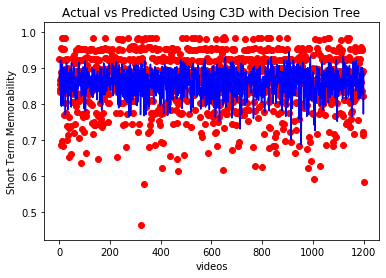

In [123]:
xTest = range(1,1201)
plt.scatter(xTest, actual["shortActual"], color = 'red')
plt.plot(xTest, pred["shortPred"], color = 'blue')
plt.title('Actual vs Predicted Using C3D with Decision Tree')
plt.xlabel('videos')
plt.ylabel('Short Term Memorability')
plt.show()


plotting the Actual vs Predicited for Long Term Memorability



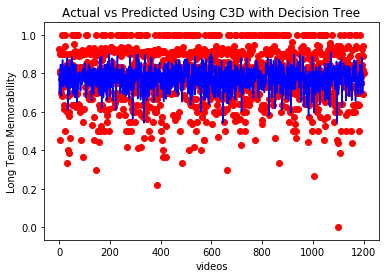

In [124]:
xTest = range(1,1201)
plt.scatter(xTest, actual["longActual"], color = 'red')
plt.plot(xTest, pred["longPred"], color = 'blue')
plt.title('Actual vs Predicted Using C3D with Decision Tree')
plt.xlabel('videos')
plt.ylabel('Long Term Memorability')
plt.show()

Fitting ANN model on C3D alone

bold text

In [139]:
# !pip install pyprind
# !pip install keras
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\anaconda3\lib\site-packages (2.1.0)


In [140]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

In [141]:
c3d_features.shape


(6000, 101)

In [142]:
max_len =101


In [143]:
X = c3d_features
y = ground_truth.iloc[:, 1:3].values

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=1)


Building a sequntial model with 2 layers.



In [146]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 0s 57us/step - loss: 0.0933 - accuracy: 0.6367 - val_loss: 0.0267 - val_accuracy: 0.7233
Epoch 2/10
4800/4800 [==============================] - 0s 32us/step - loss: 0.0205 - accuracy: 0.6946 - val_loss: 0.0147 - val_accuracy: 0.7233
Epoch 3/10
4800/4800 [==============================] - 0s 31us/step - loss: 0.0156 - accuracy: 0.7002 - val_loss: 0.0137 - val_accuracy: 0.7233
Epoch 4/10
4800/4800 [==============================] - 0s 31us/step - loss: 0.0149 - accuracy: 0.7000 - val_loss: 0.0136 - val_accuracy: 0.7233
Epoch 5/10
4800/4800 [==============================] - 0s 32us/step - loss: 0.0147 - accuracy: 0.7002 - val_loss: 0.0136 - val_accuracy: 0.7233
Epoch 6/10
4800/4800 [==============================] - 0s 29us/step - loss: 0.0146 - accuracy: 0.7002 - val_loss: 0.0136 - val_accuracy: 0.7233
Epoch 7/10
4800/4800 [==============================] - 0s 30us/step - loss: 0.014

In [147]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.265
The Spearman's correlation coefficient is: 0.133


After changing the number of trees in the Random Forest method it is noticed that maximum accuracy is achieved with 500 trees.



## **Merging** both the caption features and C3D features


In [148]:
#Using Count vector features
c3dAndCaption_features = np.concatenate((caption_features, c3d_features), axis=1)

In [149]:
#Using TFIDF features
c3dAndCaption_features = np.concatenate((captions_tfidf_features, c3d_features), axis=1)

In [150]:
c3dAndCaption_features.shape
#101 c3d features + 5087 caption features are merged

(6000, 5188)

**Inputting the data into X and Y variables**



In [151]:
X = c3dAndCaption_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=1)

Using Linear Regression Model on Captions and C3D features

In [153]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.064
The Spearman's correlation coefficient is: 0.003


Using Decision Tree Regression Model on Captions and C3D features



In [155]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [156]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.142
The Spearman's correlation coefficient is: 0.012


Fitting Random Forest Regression model on Captions and C3D features

In [157]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [158]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.306
The Spearman's correlation coefficient is: 0.091


ANN

In [159]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

In [160]:
c3dAndCaption_features.shape


(6000, 5188)

In [161]:
max_len =5188


In [162]:
X = c3dAndCaption_features
y = ground_truth.iloc[:, 1:3].values

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1,random_state=1)


In [164]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Train on 5400 samples, validate on 600 samples
Epoch 1/10
5400/5400 [==============================] - 1s 178us/step - loss: 0.0575 - accuracy: 0.6809 - val_loss: 0.0194 - val_accuracy: 0.7200
Epoch 2/10
5400/5400 [==============================] - 1s 152us/step - loss: 0.0170 - accuracy: 0.7024 - val_loss: 0.0148 - val_accuracy: 0.7200
Epoch 3/10
5400/5400 [==============================] - 1s 147us/step - loss: 0.0152 - accuracy: 0.7033 - val_loss: 0.0147 - val_accuracy: 0.7200
Epoch 4/10
5400/5400 [==============================] - 1s 145us/step - loss: 0.0148 - accuracy: 0.7031 - val_loss: 0.0146 - val_accuracy: 0.7200
Epoch 5/10
5400/5400 [==============================] - 1s 146us/step - loss: 0.0145 - accuracy: 0.7031 - val_loss: 0.0146 - val_accuracy: 0.7200
Epoch 6/10
5400/5400 [==============================] - 1s 148us/step - loss: 0.0146 - accuracy: 0.7031 - val_loss: 0.0147 - val_accuracy: 0.7200
Epoch 7/10
5400/5400 [==============================] - 1s 148us/step - loss:

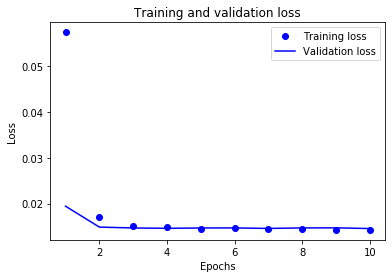

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [166]:
# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


## **HMP**

Defining the method for reading HMP Features from a file

In [167]:
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

Calling the method for fetching HMP features and storing them into a array list using loop Method works similar to that of the



In [168]:
HMP_feature_list= []
video_names_list = []
path = 'HMP/*.txt'
for filename in glob.glob('HMP/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0]+'.webm')
    video_names_list.append(name)
    HMP_features = read_HMP(filename)
    HMP_feature_list.append(HMP_features)

In [180]:
HMP_features = pd.DataFrame(np.array(HMP_feature_list).reshape(6000,6075))
HMP_features["video"] = video_names_list
HMP_features["video"] = HMP_features["video"].str.slice(start=4)

In [182]:
HMP_features.head()

,0,1,2,3,4,5,6,7,8,9,...,6066,6067,6068,6069,6070,6071,6072,6073,6074,video
0,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,...,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064,video10.webm
1,0.019473,0.005004,0.000098,0.0,0.001991,0.000038,0.0,0.000000,0.000011,0.0,...,0.000056,0.000013,0.000000,0.000045,0.000178,0.000022,0.000071,0.000256,0.000085,video100.webm
2,0.007250,0.002722,0.000050,0.0,0.001070,0.000055,0.0,0.000000,0.000035,0.0,...,0.000090,0.000060,0.000000,0.000100,0.000234,0.000010,0.000164,0.000413,0.000025,video1001.webm
3,0.071224,0.011862,0.000320,0.0,0.007180,0.000301,0.0,0.000002,0.000208,0.0,...,0.000093,0.000049,0.000000,0.000086,0.000208,0.000019,0.000063,0.000236,0.000139,video1003.webm
4,0.053318,0.009491,0.000454,0.0,0.004754,0.000414,0.0,0.000004,0.000155,0.0,...,0.000290,0.000113,0.000007,0.000190,0.000808,0.000111,0.000317,0.000974,0.001045,video1004.webm


In [183]:
hdf = pd.merge(ground_truth, HMP_features , on='video')

In [184]:
hdf.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,...,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3.webm,0.924,0.846,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,...,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4.webm,0.923,0.667,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,...,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6.webm,0.863,0.700,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,...,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8.webm,0.922,0.818,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,...,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10.webm,0.950,0.900,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,...,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


In [185]:
hmp_features = hdf.iloc[:,3:6078].values

**Assigning the features to X and Y**

In [186]:
X = hmp_features
Y = ground_truth.iloc[:, 1:3].values

**Splitting the dataset into the Training set and Test set**

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Using Linear Regression Model on HMP**

In [190]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.048
The Spearman's correlation coefficient is: 0.010


**Using Decision Tree Regression Model on HMP**

In [193]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [194]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.065
The Spearman's correlation coefficient is: 0.085


**Fitting Random Forest Regression model on HMPfeatures**



In [195]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [196]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.217
The Spearman's correlation coefficient is: 0.067


**Using ANN Sequential Model on HMP Features**

In [197]:
!pip install pyprind

In [198]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

In [199]:
hmp_features.shape

(6000, 6075)

In [200]:
max_len = 6075

In [201]:
X = hmp_features
y = ground_truth.iloc[:, 1:3].values

In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

**Building a sequntial model with 2 layers.**

In [203]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 1s 239us/step - loss: 0.0813 - accuracy: 0.6879 - val_loss: 0.0247 - val_accuracy: 0.7133
Epoch 2/10
4800/4800 [==============================] - 1s 199us/step - loss: 0.0208 - accuracy: 0.6979 - val_loss: 0.0163 - val_accuracy: 0.7133
Epoch 3/10
4800/4800 [==============================] - 1s 201us/step - loss: 0.0163 - accuracy: 0.7017 - val_loss: 0.0150 - val_accuracy: 0.7133
Epoch 4/10
4800/4800 [==============================] - 1s 202us/step - loss: 0.0154 - accuracy: 0.7021 - val_loss: 0.0146 - val_accuracy: 0.7133
Epoch 5/10
4800/4800 [==============================] - 1s 201us/step - loss: 0.0148 - accuracy: 0.7025 - val_loss: 0.0145 - val_accuracy: 0.7133
Epoch 6/10
4800/4800 [==============================] - 1s 199us/step - loss: 0.0148 - accuracy: 0.7027 - val_loss: 0.0145 - val_accuracy: 0.7133
Epoch 7/10
4800/4800 [==============================] - 1s 205us/step - loss

In [204]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.159
The Spearman's correlation coefficient is: 0.062


**HMP is clearly performing worst compared to other features, So i have excluded these features in the final model**

In [ ]:
"""Conclusion:
None of the models Outperfomed the model that used captions when used with TFIDF vectorizer, 
Therefore My final model will be based on TFIDF values of captions using Random Forest Regressor.
"""